PW 01 : Exercice 4
=================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# use for displing inside the notebook
%matplotlib inline

# %matplotlib notebook for animate picture (usefull for 3d)

In [3]:
# import the dataset as a pandas DataFrame

# your path here

path = './iris.txt'
iris_dataset = pd.read_csv(path,sep='\t')
# iris_dataset.head()

# get the requested columns
df = iris_dataset.loc[:,['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']]
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Using matplotlib
================

In [4]:
colors = ['red','green','blue']
species = ['setosa','versicolor','virginica']
markers = ['o','d','*']

# using to plot specific categories
def insert_scatter(ax,x,y):
    ax.scatter(df.loc[df['Species'] == species[0],[x]].values,
               df.loc[df['Species'] == species[0],[y]].values,
               color=colors[0],
               marker=markers[0])
    ax.scatter(df.loc[df['Species'] == species[1],[x]].values,
                 df.loc[df['Species'] == species[1],[y]].values,
                 color=colors[1],
                 marker=markers[1])
    ax.scatter(df.loc[df['Species'] == species[2],[x]].values,
                 df.loc[df['Species'] == species[2],[y]].values,
                 color=colors[2],
                 marker=markers[2])

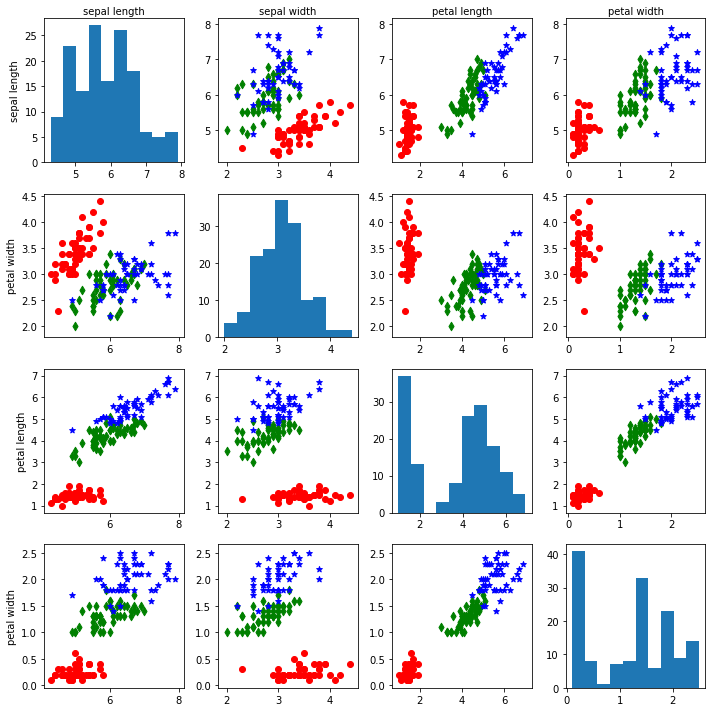

In [5]:
fig = plt.figure(figsize=(10,10))

# 1 row
ax11 = fig.add_subplot(441)
ax11.hist(df.loc[:,['Sepal.Length']].values)
ax11.set_xlabel('sepal length')
ax11.xaxis.set_label_position('top')
ax11.set_ylabel('sepal length')
ax11.yaxis.set_label_position('left')

ax12 = fig.add_subplot(442)
ax12.set_xlabel('sepal width')
ax12.xaxis.set_label_position('top')
insert_scatter(ax12,'Sepal.Width','Sepal.Length')

ax13 = fig.add_subplot(443)
ax13.set_xlabel('petal length')
ax13.xaxis.set_label_position('top')
insert_scatter(ax13,'Petal.Length','Sepal.Length')

ax14 = fig.add_subplot(444)
ax14.set_xlabel('petal width')
ax14.xaxis.set_label_position('top')
insert_scatter(ax14,'Petal.Width','Sepal.Length')

# 2 row
ax21 = fig.add_subplot(445)
ax21.yaxis.set_label_position('left')
ax21.set_ylabel('petal width')
insert_scatter(ax21,'Sepal.Length','Sepal.Width')

ax22 = fig.add_subplot(446)
ax22.hist(df.loc[:,['Sepal.Width']].values)

ax23 = fig.add_subplot(447)
insert_scatter(ax23,'Petal.Length','Sepal.Width')

ax24 = fig.add_subplot(448)
insert_scatter(ax24,'Petal.Width','Sepal.Width')

# 3 row
ax31 = fig.add_subplot(449)
ax31.yaxis.set_label_position('left')
ax31.set_ylabel('petal length')
insert_scatter(ax31,'Sepal.Length','Petal.Length')

ax32 = fig.add_subplot(4,4,10)
insert_scatter(ax32,'Sepal.Width','Petal.Length')

ax33 = fig.add_subplot(4,4,11)
ax33.hist(df.loc[:,['Petal.Length']].values)

ax34 = fig.add_subplot(4,4,12)
insert_scatter(ax34,'Petal.Width','Petal.Length')

# 4 row
ax41 = fig.add_subplot(4,4,13)
ax41.yaxis.set_label_position('left')
ax41.set_ylabel('petal width')
insert_scatter(ax41,'Sepal.Length','Petal.Width')

ax42 = fig.add_subplot(4,4,14)
insert_scatter(ax42,'Sepal.Width','Petal.Width')

ax43 = fig.add_subplot(4,4,15)
insert_scatter(ax43,'Petal.Length','Petal.Width')

ax44 = fig.add_subplot(4,4,16)
ax44.hist(df.loc[:,['Petal.Width']].values)

plt.tight_layout()

# plt.savefig('scatter_matrix.png')

plt.show()

Using pandas
============

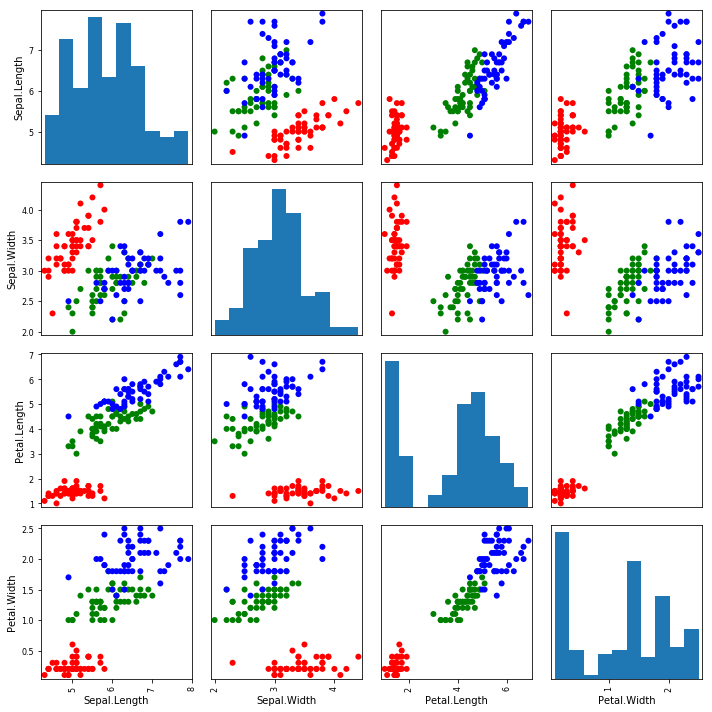

In [6]:
df['color'] = df['Species']
for i in range(0,3):
    df.loc[df['color'] == species[i],'color'] = colors[i]

#with Python 2.7.x (not recommended)
#pd.tools.plotting.scatter_matrix(df.loc[:,:],figsize=(10,10),marker='o',color=df['color'],alpha=1)
#with Python 3.6.x
pd.plotting.scatter_matrix(df.loc[:,:],figsize=(10,10),marker='o',color=df['color'],alpha=1)
plt.tight_layout()
# plt.savefig('scatter_matrix.png')
plt.show()

PW 01 : Exercice 5
=================

### Example 1
#### Task T: 
Detecting if a data point is normal or abnormal (anomaly detection task) 
#### Performance measure P:
Accuracy of points correctly detected
#### Training experience E: 
Database of "normal" and "abnormal" data from the process under supervision.

### Example 2
#### Task T: 
Face recognition
#### Performance measure P:
Correctly assign name to face
#### Training experience E:
Database of faces with names as label.



PW 01 : Exercice 6
=================

### 1) Supervised vs. unsupervised systems

**a) Given email labeled as spam/not spam, learn a spam filter.**

Supervised.

To build a database with the two classes "spam" and "non-spam" is easy to do. As spammers would like to circumvent the filter, we can try a semi-supervised system with incremental learning, where the user flags spam-mail that improves the system over time. 

**b) Given a set of news articles found on the web, group them into sets of related articles.**

Unsupervised.

 There are too many potential classes of topics to build a labelled database. We can try to build a system that will summarize an article with a "bag of words". We can then group articles that share similar bag of words. Note: how to select relevant words to enter in the "bag" is not so trivial.

**c) Given a database of customer data, automatically discover market segments and group customers into different market segments.**

Unsupervised. 

Here we don't know the different market segments in advance, so it is clearly unsupervised, i.e. we want to discover the structure in the data set. may not be known in advance or could be too numerous.

**d) Given a dataset of patients diagnosed as either having glaucoma or not, learn to classify new patients as having glaucoma or not.**

Supervised. 

Here we have again two very distinct classes, that can be labeled and separated.

### 2) Classification vs. regression systems

Can we transform a regression problem into a classification problem? What would be the benefits of doing so ?

Short answer:
Yes 

Long answer:
Yes we cant but to do so we need a way of creating a finite amount of classes, that the data points can be asigned to. These classes are sometimes given by the data itself or we can create them (like bins in a histogram). 
One benefit of classification is that we can give the output a meaningful label which can be more meaningful for a human than a predicted continuous value. Another point to consider is that we kind of "simplify" the regresssion by creating bins, which could help the learning phase in case of few data. Finally, if we assume an infinite number of bins, the classification becomes a regression again. 
